<a href="https://colab.research.google.com/github/Sparsh9990/NASDAQ-Investment-Portfolio-Analysis/blob/main/Investment_Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION B

We import all the necessary libraries and modules for Portfolio Investment Analysis.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.sandbox.stats.runs import runstest_1samp
sns.set()
plt.style.use("seaborn-v0_8")

 Installing the latest version of Python library- Yahoo Finance, used to interact with its API and retrieve financial data, such as stock prices, historical data, market indices, and more.

In [2]:
!pip install yfinance --upgrade --no-cache-dir

In [3]:
!pip install arch
from arch.unitroot import VarianceRatio

In [4]:
# Ticker is just a stock symbol
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'ADBE', 'PYPL', 'NFLX']


[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [17]:
close = pd.DataFrame()
for ticker in tickers:
    temp = yf.download(ticker,period='10y',interval='1d')
    close[ticker] = temp['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
close

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX
Date,,,,,,,,,,
2015-01-05,23.661274,39.862873,25.879185,15.109500,14.006000,0.474983,76.896271,71.980003,NaN,47.311428
2015-01-06,23.663507,39.277798,25.240501,14.764500,14.085333,0.460582,75.860214,70.529999,NaN,46.501431
2015-01-07,23.995314,39.776836,25.166271,14.921000,14.063333,0.459382,75.860214,71.110001,NaN,46.742859
2015-01-08,24.917269,40.947002,25.253954,15.023000,14.041333,0.476663,77.882492,72.919998,NaN,47.779999
2015-01-09,24.943991,40.602829,24.945570,14.846500,13.777333,0.478583,77.444168,71.839996,NaN,47.041428
...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,430.529999,192.759995,223.750000,431.660004,137.009995,599.809998,446.480011,86.860001,907.549988
2024-12-30,252.199997,424.829987,191.240005,221.300003,417.410004,137.490005,591.239990,445.799988,85.430000,900.429993
2024-12-31,250.419998,421.500000,189.300003,219.389999,403.839996,134.289993,585.510010,444.679993,85.349998,891.320007


These tickers represent  U.S. technology and growth stocks traded on American stock exchanges. The NASDAQ Composite Index is one of the major stock market indices and is often used as a benchmark for American equity performance.

Including ^IXIC in the analysis allows:

*Benchmarking:* Comparing the performance of individual stocks against the overall market performance.

*Market Correlation:* Understanding how closely each stock tracks the movement of the index.

*Portfolio Analysis:* Assessing whether the selected stocks are outperforming or underperforming the broader market.


In [19]:
close['NASDAQ'] = yf.download('^IXIC',period='10y',interval='1d')['Close']
close.dropna(inplace=True)
close

[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX,NASDAQ
Date,,,,,,,,,,,
2015-07-06,28.287897,38.715466,27.182461,21.802000,18.648001,0.488217,87.216835,80.500000,36.709999,94.571426,4991.939941
2015-07-07,28.218304,38.636974,27.402164,21.836000,17.858667,0.479019,86.888092,80.589996,36.619999,94.091431,4997.459961
2015-07-08,27.517838,38.584652,26.987167,21.485001,16.997334,0.475630,85.324074,79.989998,34.700001,93.507141,4909.759766
2015-07-09,26.956570,38.828857,27.134136,21.719500,17.194668,0.469821,85.553192,80.470001,34.500000,95.727142,4922.399902
2015-07-10,27.677235,38.907352,27.705065,22.175501,17.276667,0.478051,87.615311,80.589996,34.689999,97.228569,4997.700195
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,430.529999,192.759995,223.750000,431.660004,137.009995,599.809998,446.480011,86.860001,907.549988,19722.029297
2024-12-30,252.199997,424.829987,191.240005,221.300003,417.410004,137.490005,591.239990,445.799988,85.430000,900.429993,19486.789062
2024-12-31,250.419998,421.500000,189.300003,219.389999,403.839996,134.289993,585.510010,444.679993,85.349998,891.320007,19310.789062



Each value in the DataFrame is divided by the value in the first row for its column (its stock value on day 1) using close.div(close.iloc[0])

After dividing, we multiply every value by 100 using.mul(100) function to convert the results into percentages.


The first day’s price is chosen because normalization often starts with a baseline of 100 for the first day. This makes it easy to compare relative changes in price across multiple stocks.

Normalized Value = Current Value/First Day Value

**Normalization like this:**

*Standardizes Data:* It removes the differences in absolute price scales ( E.g., AAPL at \$28 and TSLA at $18 ) to directly compare the performance of different stocks.

*Tracks Performance:* To visualize which stock grew the most (or least) over time.

In [20]:
normalised_prices = close.div(close.iloc[0]).mul(100)
normalised_prices

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX,NASDAQ
Date,,,,,,,,,,,
2015-07-06,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-07-07,99.753982,99.797261,100.808255,100.155951,95.767196,98.116060,99.623074,100.111797,99.754835,99.492452,100.110579
2015-07-08,97.277777,99.662115,99.281546,98.546008,91.148289,97.421944,97.829821,99.366457,94.524657,98.874623,98.353743
2015-07-09,95.293650,100.292885,99.822221,99.621592,92.206495,96.232065,98.092521,99.962734,93.979844,101.222056,98.606954
2015-07-10,97.841259,100.495634,101.922578,101.713149,92.646214,97.917761,100.456879,100.111797,94.497411,102.809668,100.115391
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,903.531271,1112.036218,709.133717,1026.281990,2314.778995,28063.348346,687.722729,554.633554,236.611285,959.645024,395.077455
2024-12-30,891.547350,1097.313388,703.541916,1015.044503,2238.363297,28161.667564,677.896636,553.788805,232.715888,952.116328,390.365054
2024-12-31,885.254910,1088.712209,696.404952,1006.283822,2165.594063,27506.218612,671.326825,552.397506,232.497959,942.483413,386.839371


Explanation of the Plot-

Normalized Price (%): The y-axis shows the stock price as a percentage relative to its price on the first day. This allows to compare how each stock has performed in terms of growth, even though they may have different initial prices.

For example, if NVDA started at $100 and is now at \$300, its normalized price would show a growth of 200%.
The stocks are plotted on the same axis, to compare their relative growth.

Trend Analysis:

Stocks that show a steep upward curve have performed well in terms of growth (like NVDA).
The market index provides a benchmark for comparison to see if the individual stocks have outperformed or underperformed the overall market.


How This Data Helps Investors in Decision-Making-

Historical Performance:

An investor can analyze how a stock or index has performed historically. Stocks like NVDA, which have shown maximum growth, may indicate strong growth potential or a company with a competitive advantage, making it attractive to investors looking for high-return opportunities.

Volatility and Risk Assessment:

By comparing the growth trajectories of different stocks, an investor can assess the volatility of each stock. A stock with sharp up-and-down movements might be riskier, while a steady performer could appeal to conservative investors.
For instance, if NVDA has had high growth but also significant fluctuations, an investor might weigh the risks before investing.
Comparing Performance to Market:

Comparing the stock’s performance to a market index helps an investor see if the stock has been outperforming or underperforming relative to the market.
If a stock consistently outperforms the market (like NVDA), it may signal strong fundamentals, whereas consistent underperformance could signal potential risks or inefficiencies in the company.

<Axes: title={'center': 'Stock Comparison over the years'}, xlabel='Date'>

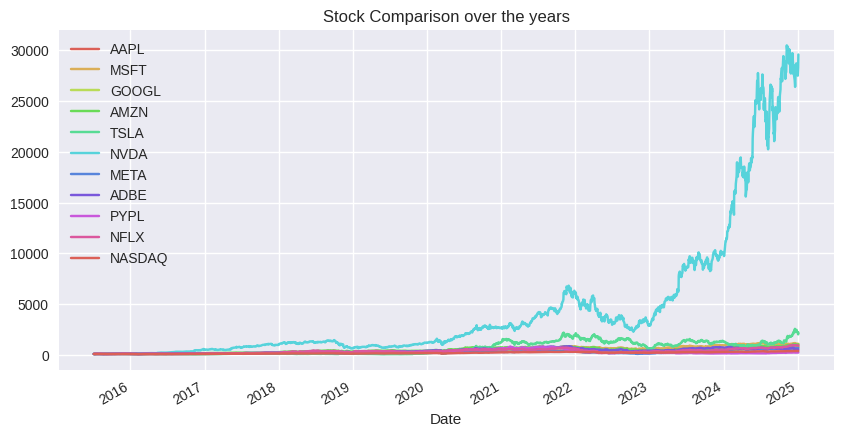

In [21]:
sns.set_palette("hls",n_colors=10)
normalised_prices.plot(figsize=(10,5),title='Stock Comparison over the years')


Why Use Log Returns?

They give a more accurate and smooth view of how stock prices change over time, especially when looking at long periods.

They help:

Additivity: log returns sum over multiple periods to get the total return, which is not the case for simple percentage returns.

Normal Distribution: Log returns often approximate a normal distribution, which is useful for financial modeling and risk analysis.

Handle price ups and downs better: They prevent from getting tricked by big increases followed by big decreases, giving a balanced picture of how the price truly changed.

Approximate continuous growth: Log returns model how investments grow when money is constantly reinvested, which is a realistic view of how many financial markets work.

Log returns are calculated for each stock in the close DataFrame. Logarithmic returns help analyze the percentage changes in stock prices.
The first day has no previous day to calculate the return, so it is removed using dropna().

SECTION C

In [22]:
'''close.shift(1) shifts the close prices down by 1 period (day in this case).
   For example, if today's closing price is $100 and yesterday's price was $98,
   then after shifting, today's value will become the value of yesterday, and
   tomorrow’s value will become the value for today.'''
#  close/close.shift(1) calculates the ratio of the current day's closing price to the previous day's closing price.

log_returns = np.log(close/close.shift(1))
log_returns.dropna(inplace=True)
log_returns

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX,NASDAQ
Date,,,,,,,,,,,
2015-07-07,-0.002463,-0.002029,0.008050,0.001558,-0.043250,-0.019019,-0.003776,0.001117,-0.002455,-0.005088,0.001105
2015-07-08,-0.025136,-0.001355,-0.015261,-0.016205,-0.049432,-0.007100,-0.018164,-0.007473,-0.053855,-0.006229,-0.017705
2015-07-09,-0.020607,0.006309,0.005431,0.010855,0.011543,-0.012289,0.002682,0.005983,-0.005780,0.023464,0.002571
2015-07-10,0.026383,0.002020,0.020823,0.020778,0.004758,0.017365,0.023817,0.001490,0.005492,0.015563,0.015182
2015-07-13,0.019122,0.020633,0.027701,0.026829,0.011548,0.006560,0.024152,0.010492,0.058503,0.038918,0.014661
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,-0.013331,-0.017453,-0.014626,-0.014641,-0.050745,-0.021088,-0.005884,-0.008208,-0.014629,-0.018115,-0.015013
2024-12-30,-0.013352,-0.013328,-0.007917,-0.011010,-0.033569,0.003497,-0.014391,-0.001524,-0.016600,-0.007876,-0.011999
2024-12-31,-0.007083,-0.007869,-0.010196,-0.008668,-0.033050,-0.023550,-0.009739,-0.002515,-0.000937,-0.010169,-0.009073


Creating a summary that shows:

The average (mean) log return for each stock.
The volatility (standard deviation) of the log returns for each stock.

Result:

The final result, summary, will be a table (or DataFrame) that shows the mean and standard deviation for each stock in your dataset. This gives a quick view of:

How consistent or volatile each stock is (based on standard deviation).
The average return for each stock over the time period analyzed.

In [23]:
summary = log_returns.describe().T.loc[:,['mean','std']]
summary

,mean,std
AAPL,0.000900,0.018099
MSFT,0.001000,0.017058
GOOGL,0.000817,0.018135
AMZN,0.000975,0.020559
TSLA,0.001293,0.036594
NVDA,0.002380,0.030870
META,0.000810,0.024266
ADBE,0.000701,0.021354
PYPL,0.000364,0.024110
NFLX,0.000933,0.027840


Logarithmic returns are time-scaling:

they are easier to scale to different time intervals (like weekly, monthly, etc.) because they reflect the compound effect over time.

To scale a log return from one period to another, simply multiply the log return by the number of periods.
For example, daily log returns can be multiplied by the number of trading days in a year (typically 252) to estimate annual log returns.

A_mean (Annualized Mean Return)

On average, how much a stock goes up or down each year.

Current data is for daily price changes. So, the average daily return gets multiplied by 252 (since there are about 252 trading days in a year).

Why is it done?

This helps predict the average return over the whole year. For example, if a stock has an average daily return of 0.5%, multiplying by 252 gives us an estimate of how much we might make (or lose) if that trend continues for an entire year.

Result:

Now, it's possible to compare how much each stock is expected to grow in one year. Some stocks might have higher expected returns, and others might have lower ones.

A_std (Annualized Standard Deviation)

How much a stock’s price bounces up and down over a year.

The standard deviation (how much the price bounces on an average day) is multiplied by the square root of 252 (because the volatility doesn’t grow linearly over time).

Why do we do this?

This helps understanding how risky or volatile a stock is. If the standard deviation is high, it means the stock’s price can jump up and down a lot. A low standard deviation means the stock's price is more stable.

Result:

Now it is possible to see how risky each stock is on an annual basis. Some stocks might be very volatile, while others might show less price movement over time.

In Simple Terms:

A_mean tells the expected profit (or loss) from holding a stock for a year.
A_std tells how much risk is involved, based on how much the stock price moves up and down.

Why is this useful for investors?

Investors want to know two things:
How much money can they expect to make? ( A_mean )
How risky is it? ( A_std )

By looking at both the expected return and the risk, investors can decide if they want to invest in a stock based on how much they’re willing to make and how much risk they can handle.

In [24]:
summary['A_mean'] = summary['mean']  * 252
summary['A_std'] = summary['std']  * np.sqrt(252)
summary

,mean,std,A_mean,A_std
AAPL,0.000900,0.018099,0.226822,0.287314
MSFT,0.001000,0.017058,0.252101,0.270783
GOOGL,0.000817,0.018135,0.205924,0.287878
AMZN,0.000975,0.020559,0.245623,0.326366
TSLA,0.001293,0.036594,0.325828,0.580911
NVDA,0.002380,0.030870,0.599706,0.490052
META,0.000810,0.024266,0.204068,0.385203
ADBE,0.000701,0.021354,0.176732,0.338983
PYPL,0.000364,0.024110,0.091666,0.382738
NFLX,0.000933,0.027840,0.235217,0.441948


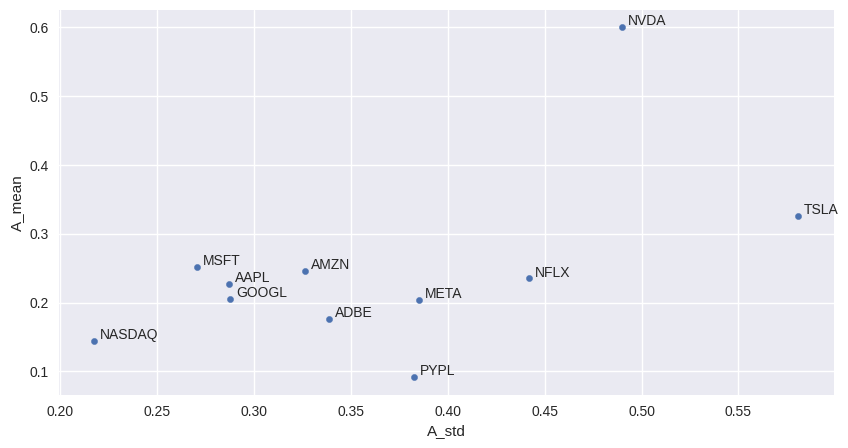

In [25]:
summary.plot.scatter(x='A_std',y='A_mean',figsize=(10,5))
for ticker in summary.index:
    plt.annotate(ticker,xy=(summary.loc[ticker,'A_std']+0.003,summary.loc[ticker,'A_mean']+0.003),size=10)

SECTION D

In [26]:
covariance = log_returns.cov()
covariance

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX,NASDAQ
AAPL,0.000328,0.000216,0.000202,0.000213,0.000286,0.000308,0.000230,0.000225,0.000225,0.000216,0.000199
MSFT,0.000216,0.000291,0.000225,0.000236,0.000259,0.000326,0.000245,0.000261,0.000231,0.000228,0.000200
GOOGL,0.000202,0.000225,0.000329,0.000242,0.000249,0.000304,0.000277,0.000237,0.000225,0.000230,0.000195
AMZN,0.000213,0.000236,0.000242,0.000423,0.000302,0.000340,0.000302,0.000262,0.000257,0.000303,0.000211
TSLA,0.000286,0.000259,0.000249,0.000302,0.001339,0.000467,0.000287,0.000307,0.000347,0.000345,0.000280
NVDA,0.000308,0.000326,0.000304,0.000340,0.000467,0.000953,0.000363,0.000377,0.000351,0.000373,0.000312
META,0.000230,0.000245,0.000277,0.000302,0.000287,0.000363,0.000589,0.000276,0.000304,0.000311,0.000227
ADBE,0.000225,0.000261,0.000237,0.000262,0.000307,0.000377,0.000276,0.000456,0.000286,0.000284,0.000220
PYPL,0.000225,0.000231,0.000225,0.000257,0.000347,0.000351,0.000304,0.000286,0.000581,0.000293,0.000223
NFLX,0.000216,0.000228,0.000230,0.000303,0.000345,0.000373,0.000311,0.000284,0.000293,0.000775,0.000217


In [27]:
log_returns

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX,NASDAQ
Date,,,,,,,,,,,
2015-07-07,-0.002463,-0.002029,0.008050,0.001558,-0.043250,-0.019019,-0.003776,0.001117,-0.002455,-0.005088,0.001105
2015-07-08,-0.025136,-0.001355,-0.015261,-0.016205,-0.049432,-0.007100,-0.018164,-0.007473,-0.053855,-0.006229,-0.017705
2015-07-09,-0.020607,0.006309,0.005431,0.010855,0.011543,-0.012289,0.002682,0.005983,-0.005780,0.023464,0.002571
2015-07-10,0.026383,0.002020,0.020823,0.020778,0.004758,0.017365,0.023817,0.001490,0.005492,0.015563,0.015182
2015-07-13,0.019122,0.020633,0.027701,0.026829,0.011548,0.006560,0.024152,0.010492,0.058503,0.038918,0.014661
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,-0.013331,-0.017453,-0.014626,-0.014641,-0.050745,-0.021088,-0.005884,-0.008208,-0.014629,-0.018115,-0.015013
2024-12-30,-0.013352,-0.013328,-0.007917,-0.011010,-0.033569,0.003497,-0.014391,-0.001524,-0.016600,-0.007876,-0.011999
2024-12-31,-0.007083,-0.007869,-0.010196,-0.008668,-0.033050,-0.023550,-0.009739,-0.002515,-0.000937,-0.010169,-0.009073


In [28]:
log_returns.drop('NASDAQ',axis=1,inplace=True)
correlation = log_returns.corr()
correlation


,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,META,ADBE,PYPL,NFLX
AAPL,1.000000,0.698065,0.614068,0.571392,0.431347,0.551819,0.524094,0.581230,0.516588,0.429155
MSFT,0.698065,1.000000,0.727366,0.673261,0.415504,0.618324,0.592370,0.717352,0.562182,0.479524
GOOGL,0.614068,0.727366,1.000000,0.649718,0.374557,0.543295,0.630604,0.612392,0.513538,0.455496
AMZN,0.571392,0.673261,0.649718,1.000000,0.401498,0.535541,0.604802,0.596688,0.519306,0.529749
TSLA,0.431347,0.415504,0.374557,0.401498,1.000000,0.412986,0.322721,0.392711,0.393677,0.338560
NVDA,0.551819,0.618324,0.543295,0.535541,0.412986,1.000000,0.484987,0.571564,0.470935,0.433715
META,0.524094,0.592370,0.630604,0.604802,0.322721,0.484987,1.000000,0.531970,0.518880,0.460561
ADBE,0.581230,0.717352,0.612392,0.596688,0.392711,0.571564,0.531970,1.000000,0.554941,0.477872
PYPL,0.516588,0.562182,0.513538,0.519306,0.393677,0.470935,0.518880,0.554941,1.000000,0.437139
NFLX,0.429155,0.479524,0.455496,0.529749,0.338560,0.433715,0.460561,0.477872,0.437139,1.000000


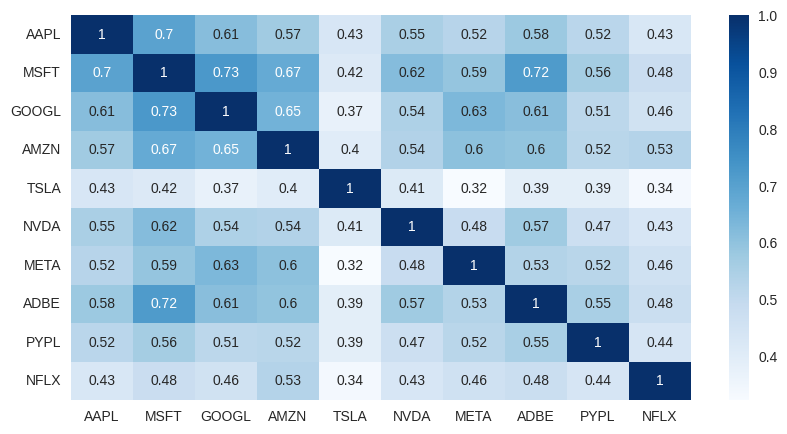

In [29]:

plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap='Blues',annot_kws={'size':10}, vmax=1)
plt.show()

SECTION E

In [30]:
beta = covariance['NASDAQ']/covariance.iloc[-1,-1]
beta

,NASDAQ
AAPL,1.060184
MSFT,1.065467
GOOGL,1.037783
AMZN,1.123655
TSLA,1.490114
NVDA,1.663206
META,1.210492
ADBE,1.171906
PYPL,1.189220
NFLX,1.157361


In [31]:
summary ['beta'] = beta

summary

,mean,std,A_mean,A_std,beta
AAPL,0.000900,0.018099,0.226822,0.287314,1.060184
MSFT,0.001000,0.017058,0.252101,0.270783,1.065467
GOOGL,0.000817,0.018135,0.205924,0.287878,1.037783
AMZN,0.000975,0.020559,0.245623,0.326366,1.123655
TSLA,0.001293,0.036594,0.325828,0.580911,1.490114
NVDA,0.002380,0.030870,0.599706,0.490052,1.663206
META,0.000810,0.024266,0.204068,0.385203,1.210492
ADBE,0.000701,0.021354,0.176732,0.338983,1.171906
PYPL,0.000364,0.024110,0.091666,0.382738,1.189220
NFLX,0.000933,0.027840,0.235217,0.441948,1.157361


<Axes: title={'center': 'Beta'}>

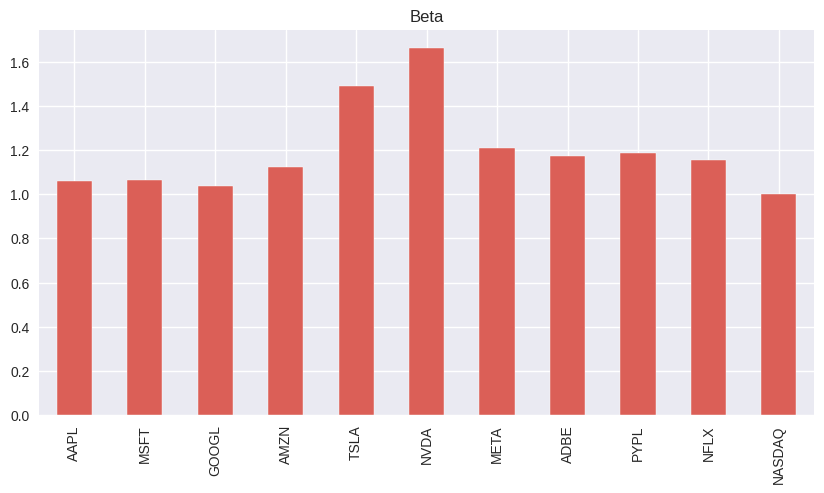

In [32]:
beta.plot.bar(figsize=(10,5),title='Beta')

SECTION F

In [33]:
stock_var = log_returns.var()
stock_var

,0
AAPL,0.000328
MSFT,0.000291
GOOGL,0.000329
AMZN,0.000423
TSLA,0.001339
NVDA,0.000953
META,0.000589
ADBE,0.000456
PYPL,0.000581
NFLX,0.000775


In [34]:
log_returns['NASDAQ'] = np.log(close['NASDAQ'] / close['NASDAQ'].shift(1))
market_var = log_returns['NASDAQ'].var()
market_var

0.00018775964058845488

In [35]:
mkt_log_returns = np.log(close['NASDAQ'] / close['NASDAQ'].shift(1))

In [36]:
mkt_std_dev = mkt_log_returns.std()
print(mkt_std_dev)

0.013702541391597942


In [37]:
risk = pd.DataFrame()
risk['tot_risk'] = summary['A_std']
risk['sys_risk'] = summary['beta'] * mkt_std_dev
risk['unsys_risk'] = risk['tot_risk'] - risk['sys_risk']
risk

,tot_risk,sys_risk,unsys_risk
AAPL,0.287314,0.014527,0.272787
MSFT,0.270783,0.014600,0.256183
GOOGL,0.287878,0.014220,0.273657
AMZN,0.326366,0.015397,0.310969
TSLA,0.580911,0.020418,0.560492
NVDA,0.490052,0.022790,0.467262
META,0.385203,0.016587,0.368617
ADBE,0.338983,0.016058,0.322925
PYPL,0.382738,0.016295,0.366443
NFLX,0.441948,0.015859,0.426089


<Axes: title={'center': 'Risk'}>

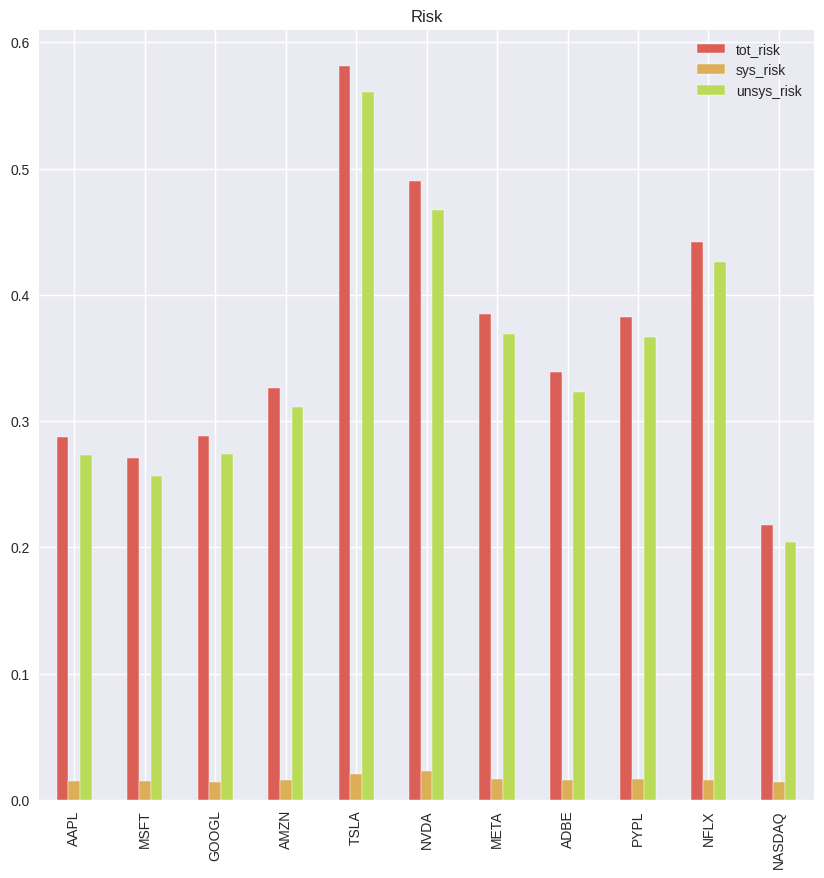

In [38]:
risk.plot.bar(figsize=(10,10),title='Risk')

SECTION G

In [39]:
independent_var = '^IXIC'
dependent_vars = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'ADBE', 'PYPL', 'NFLX']
data = yf.download(tickers + [independent_var], start="2014-01-01", end="2024-01-01")

[*********************100%***********************]  11 of 11 completed


In [41]:
data = data['Close']
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

In [42]:
y = [independent_var]
x = [dependent_vars]
X = data[independent_var]
X = sm.add_constant(X)

In [43]:
results = {}
for ticker in tickers:
    y = data[ticker]
y = pd.to_numeric(y, errors='coerce')
X_ticker = X.loc[y.index]
model = sm.OLS(y, X_ticker)
result = model.fit()

In [44]:
for ticker, result in results.items():
    print(f"\nRegression Results for {'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'ADBE', 'PYPL', 'NFLX'}:")

In [45]:
for ticker in tickers:
  print(result.summary(ticker))

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     4654.
Date:                Fri, 03 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:49:17   Log-Likelihood:                -12534.
No. Observations:                2138   AIC:                         2.507e+04
Df Residuals:                    2136   BIC:                         2.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.1691      5.356     -5.820      0.0

SECTION H

In [46]:
data = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start="2014-01-01", end="2023-01-01")
    data[ticker] = stock_data['Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
returns = stock_data['Close'].pct_change().dropna()
autocorrelation = acf(returns, nlags=10)
print("Autocorrelations:", autocorrelation)

Autocorrelations: [ 1.00000000e+00 -6.07326903e-03  3.82486532e-02  7.25955086e-03
  7.33755970e-04 -3.91892530e-02 -3.14487344e-02  8.65949259e-03
 -2.55899699e-02  3.35467232e-02 -3.25655930e-02]


In [48]:
z, p_value = runstest_1samp(returns)
print(f"Run Test: z = {z}, p-value = {p_value}")

Run Test: z = 1.9576616218645053, p-value = 0.050269731386735926


In [49]:
vr = VarianceRatio(returns)
print(vr.summary)

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.VarianceRatio'>
"""
     Variance-Ratio Test Results     
Test Statistic                -10.440
P-value                         0.000
Lags                                2
-------------------------------------

Computed with overlapping blocks (de-biased)
""">
